In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [12]:
#converting categorical to numeric creating dummy variables
spec=pd.get_dummies(df['Species'],drop_first=True)
df=pd.concat([df,spec],axis=1)

In [13]:
df.drop(['Species'],axis=1,inplace=True)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-versicolor,Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,False,True
146,147,6.3,2.5,5.0,1.9,False,True
147,148,6.5,3.0,5.2,2.0,False,True
148,149,6.2,3.4,5.4,2.3,False,True


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [18]:
X = df.drop(['Iris-virginica'], axis=1)
y = df['Iris-virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# Test different values of K
k_range = range(1, 21)
accuracy_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    print(f"K={k} --> Accuracy: {accuracy:.2f}")


K=1 --> Accuracy: 1.00
K=2 --> Accuracy: 1.00
K=3 --> Accuracy: 1.00
K=4 --> Accuracy: 1.00
K=5 --> Accuracy: 1.00
K=6 --> Accuracy: 1.00
K=7 --> Accuracy: 1.00
K=8 --> Accuracy: 1.00
K=9 --> Accuracy: 1.00
K=10 --> Accuracy: 1.00
K=11 --> Accuracy: 1.00
K=12 --> Accuracy: 1.00
K=13 --> Accuracy: 1.00
K=14 --> Accuracy: 1.00
K=15 --> Accuracy: 1.00
K=16 --> Accuracy: 1.00
K=17 --> Accuracy: 1.00
K=18 --> Accuracy: 1.00
K=19 --> Accuracy: 1.00
K=20 --> Accuracy: 1.00


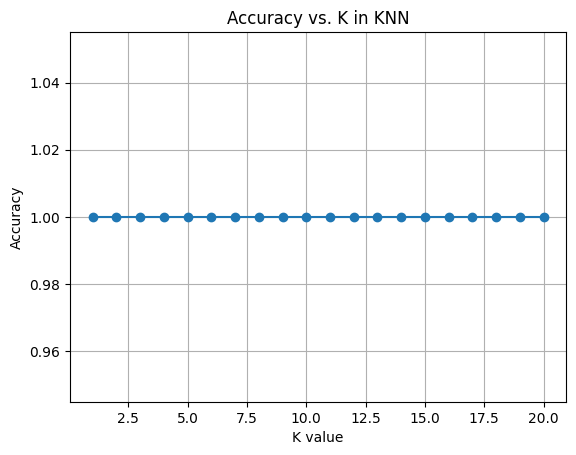

In [19]:
plt.plot(k_range, accuracy_scores, marker='o')
plt.title('Accuracy vs. K in KNN')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [27]:
X = df.drop(['Species'], axis=1)
y = df['Species']  # Multi-class target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Try different K values
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(f"\nK={k} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:\n", classification_report(y_test, y_pred))


K=1 Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


K=2 Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


K=3 Accuracy: 1.00
Classification Report:
                  precision    recall  f1-score   support

    Ir